#### The main goal is to build a model that can predict the total number of bike rentals (cnt) for a given time and condition.


In [ ]:
import numpy as np
import  pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Dataset.csv')

In [81]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [83]:
df.shape  # shape of the dataset

(17379, 17)

In [84]:
df.keys() 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [85]:
df.nunique()  ##It counts the number of unique (distinct) values in each column of a DataFrame.

instant       17379
dteday          731
season            5
yr                3
mnth             13
hr               24
holiday           3
weekday           7
workingday        3
weathersit        5
temp             51
atemp            66
hum              90
windspeed        31
casual          323
registered      777
cnt             869
dtype: int64

In [86]:
df["dteday"] = pd.to_datetime(df["dteday"], format="%d-%m-%Y")   ## To convert object into dateformate 

### Exploratory Data analysis

In [87]:
df.isnull().sum()## data set have no missing value


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [88]:
(df == '?').sum()  ## In data have Question-mark model can not uderstand

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [89]:
df.replace('?', np.nan, inplace=True)### Thats why ?--convert to Nan Using Replace fun

In [90]:
#### Agian checking Missing values
df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [128]:

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011.0,1.0,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0,3.0,13.0,16
1,2,2011-01-01,springer,2011.0,1.0,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0,8.0,32.0,40
2,3,2011-01-01,springer,2011.0,1.0,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0,5.0,27.0,32
3,4,2011-01-01,springer,2011.0,1.0,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0,3.0,10.0,13
4,5,2011-01-01,springer,2011.0,1.0,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0,0.0,1.0,1


In [129]:
df['yr']=df['yr'].astype('float')
df['mnth']=df['mnth'].astype('float')
df['temp']=df['temp'].astype('float')
df['atemp']=df['atemp'].astype('float')
df['hum']=df['hum'].astype('float')
df['windspeed']=df['windspeed'].astype('float')
df['casual']=df['casual'].astype('float')
df['registered']=df['registered'].astype('float')   # converting datatypes

In [130]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
num_col=[i for i in df.columns if df[i].dtype!='O']

In [131]:
for cat in cat_col:
    df[cat].fillna(df[cat].mode()[0], inplace=True)

In [132]:
for num in num_col:
    df[num].fillna(df[num].median(), inplace=True)

In [133]:
df.isnull().sum()  

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [134]:
df.duplicated().sum() ##there are no duplicate inthe data set

np.int64(0)

In [135]:
###df.drop_duplicates(inplace=True,ignore_index=True)

In [136]:
df.describe().T    # statistical information about the dataset

,count,mean,min,25%,50%,75%,max,std
instant,17379.0,8690.0,1.0,4345.5,8690.0,13034.5,17379.0,5017.0295
dteday,17379,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
yr,17379.0,2011.502618,2011.0,2011.0,2012.0,2012.0,2012.0,0.500008
mnth,17379.0,6.537488,1.0,4.0,7.0,10.0,12.0,3.438528
hr,17379.0,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
weekday,17379.0,3.003683,0.0,1.0,3.0,5.0,6.0,2.005771
temp,17379.0,0.497133,0.02,0.34,0.5,0.66,1.0,0.192464
atemp,17379.0,0.475854,0.0,0.3333,0.4848,0.6212,1.0,0.1718
hum,17379.0,0.627209,0.0,0.48,0.63,0.78,1.0,0.192906
windspeed,17379.0,0.190081,0.0,0.1045,0.194,0.2537,0.8507,0.122303


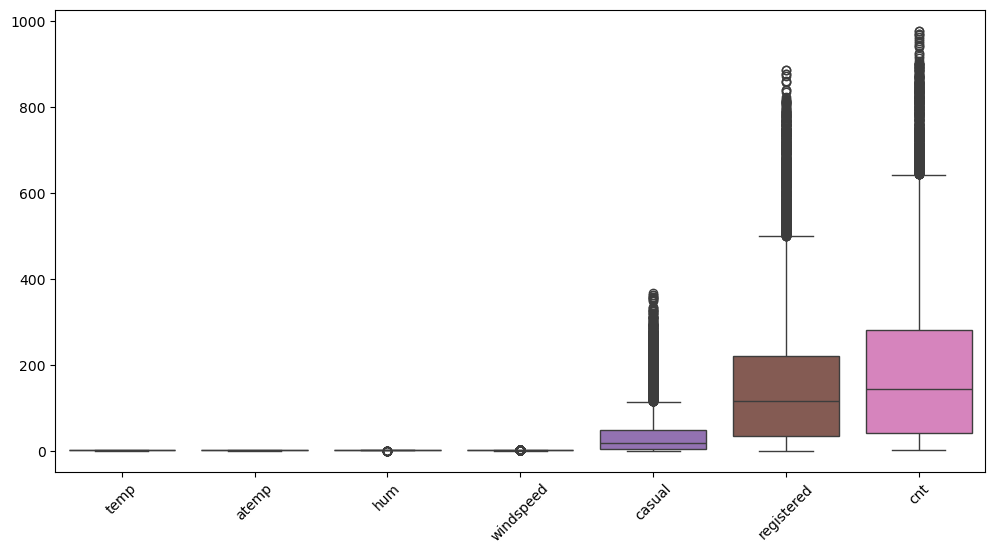

In [137]:
## Outer Layer Detection
num_col = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_col])
plt.xticks(rotation=45)
plt.show()

In [138]:
outlier_summary = {}

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'temp': 0,
 'atemp': 0,
 'hum': 22,
 'windspeed': 341,
 'casual': 1192,
 'registered': 680,
 'cnt': 505}

In [139]:
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['cnt'] < Q1 - 1.5*IQR) | (df['cnt'] > Q3 + 1.5*IQR)]
outliers.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,fall,2011.0,8.0,14,No,2,Working Day,Clear,0.72,0.6515,0.30,0.0896,149.0,502.0,651
10358,10359,2012-03-12,springer,2012.0,3.0,17,No,1,Working Day,Mist,0.62,0.6212,0.38,0.4179,87.0,557.0,644
10359,10360,2012-03-12,springer,2012.0,3.0,18,No,1,Working Day,Mist,0.60,0.6212,0.43,0.1940,89.0,623.0,712
10382,10383,2012-03-13,springer,2012.0,3.0,17,No,2,Working Day,Clear,0.70,0.6364,0.37,0.1045,62.0,614.0,676
10383,10384,2012-03-13,springer,2012.0,3.0,18,No,2,Working Day,Clear,0.70,0.6364,0.34,0.2985,96.0,638.0,734


In [140]:
df_make= df.copy()

for col in num_col:
    Q1 = df_make[col].quantile(0.25)
    Q3 = df_make[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_make = df_make[(df_make[col] >= lower) & (df_make[col] <= upper)]

In [141]:
outlier_summary = {}

num_col = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for col in num_col:
    Q1 = df_make[col].quantile(0.25)
    Q3 = df_make[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_make[(df_make[col] < lower) | (df_make[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary

{'temp': 0,
 'atemp': 0,
 'hum': 0,
 'windspeed': 0,
 'casual': 571,
 'registered': 201,
 'cnt': 1}

In [142]:
print("Before:", df.shape)
print("After :", df_make.shape)

Before: (17379, 17)
After : (14934, 17)


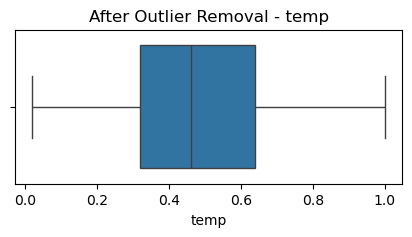

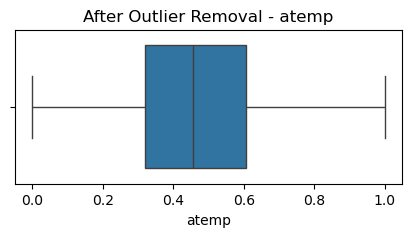

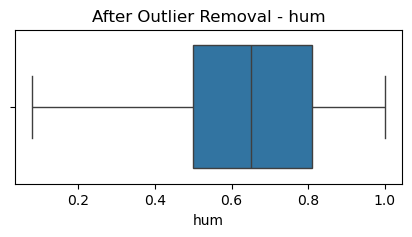

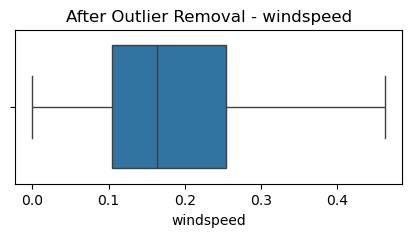

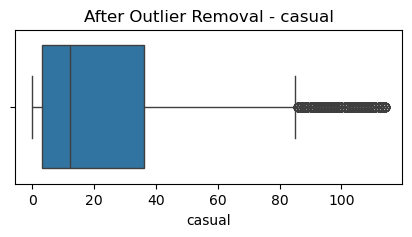

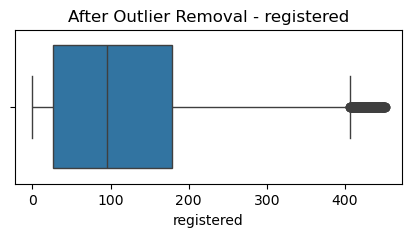

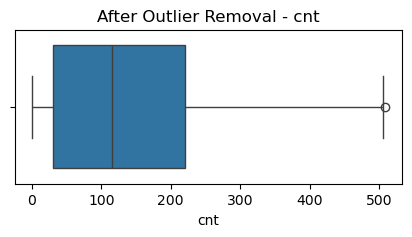

In [143]:
num_col = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in num_col:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df_make[col])
    plt.title(f'After Outlier Removal - {col}')
    plt.show()

### Data Visualization

##### Using Donut Chart Season-Wise/Bike-Rentals

In [144]:
season_cnt=df_make.groupby('season')['cnt'].sum()

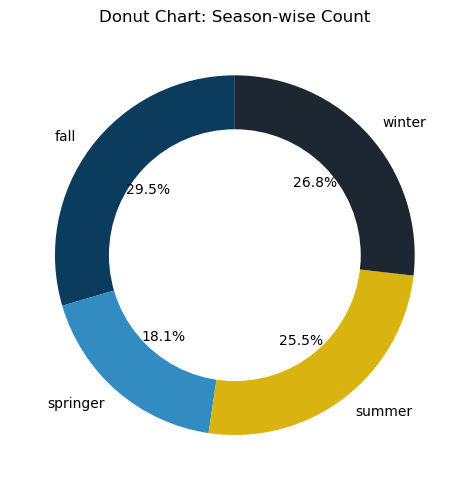

In [145]:
plt.figure(figsize=(5,5))

colors = ['#0b3c5d', '#328cc1', '#d9b310', '#1d2731']


plt.pie(
    season_cnt,
    labels=season_cnt.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

# Create donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Donut Chart: Season-wise Count')
plt.tight_layout()
plt.show()


##### The donut chart shows the percentage distribution of counts across different seasons.

##### One season contributes the largest share, indicating higher activity/demand during that season.

##### Other seasons have comparatively lower proportions, showing seasonal variation in the data.

##### Overall, the chart clearly highlights that seasonality has a significant impact on the total count.

#### Using Scattle plot Temperature vs Bike Rentals

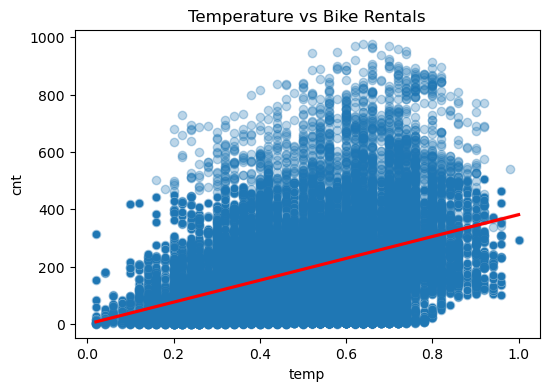

In [146]:

## Scattle plot Temperature vs Bike Rentals
plt.figure(figsize=(6,4))
sns.scatterplot(x='temp', y='cnt', data=df_make)
sns.regplot(
    x=df['temp'],
    y=df['cnt'],
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Temperature vs Bike Rentals")
plt.show()

##### Each dot represents the number of bike rentals at a specific temperature.

##### The red line shows the overall trend between temperature and rentals.

##### As temperature increases, bike rentals increase.

##### Very low rentals are seen during cold weather.

##### Warmer weather encourages people to go outside and use bikes.

##### This shows a positive correlation between temperature and bike rentals.

##### Temperature is an important feature for predicting bike demand.

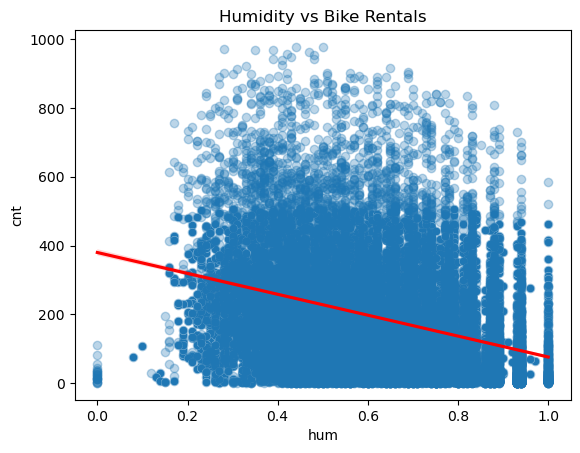

In [147]:
## Scattle plot Humidity vs Bike Rentals
sns.scatterplot(x='hum', y='cnt', data=df_make)
sns.regplot(
    x=df['hum'],
    y=df['cnt'],
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title("Humidity vs Bike Rentals")
plt.show()

##### Each dot represents bike rentals at a certain humidity level.

##### The red line slopes downward, showing the trend.

##### As humidity increases, bike rentals decrease.

##### High humidity makes weather uncomfortable for cycling.

##### People avoid biking when air feels sticky or heavy.

##### This shows a negative correlation between humidity and bike rentals.

##### Humidity impacts user comfort and riding decisions.

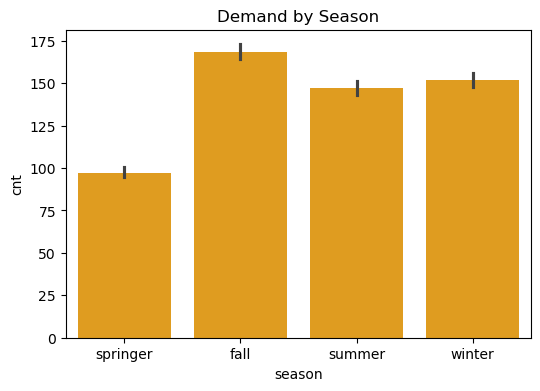

In [148]:
#Bar Plot Season vs Average Rentals
plt.figure(figsize=(6,4))
sns.barplot(x="season", y="cnt", data=df_make,color='orange')
plt.title("Demand by Season")
plt.show()

##### The height of each bar represents the mean bike rental demand for that season.

##### Bike rentals are highest in the fall season, followed by summer and winter., indicating greater demand during favorable weather conditions.

##### The lowest number of bike rentals occurs in the spring season., likely due to unfavorable climate or fewer commuting activities.

##### This clearly demonstrates that season is an important factor influencing bike rental demand.

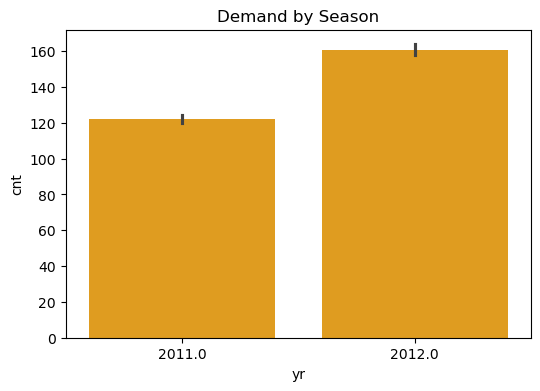

In [149]:
plt.figure(figsize=(6,4))
sns.barplot(x="yr", y="cnt", data=df_make,color='orange')
plt.title("Demand by Season")
plt.show()

##### This bar plot illustrates the average bike rental demand across different years.
##### The comparison indicates that bike rental demand was significantly lower in 2011 than in 2012.

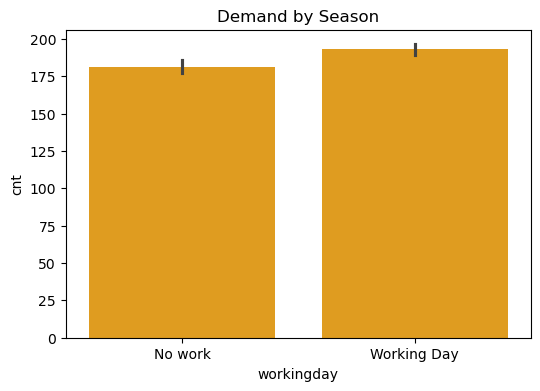

In [150]:
plt.figure(figsize=(6,4))
sns.barplot(x="workingday", y="cnt", data=df,color='orange')
plt.title("Demand by Season")
plt.show()

##### The bar plot shows that bike rentals are slightly higher on working days compared to non-working days.
##### This suggests that many people use bikes for daily commuting, such as going to work or college.
##### The difference is not very large, which means bikes are used on both working and non-working days, but working days have a little more demand.

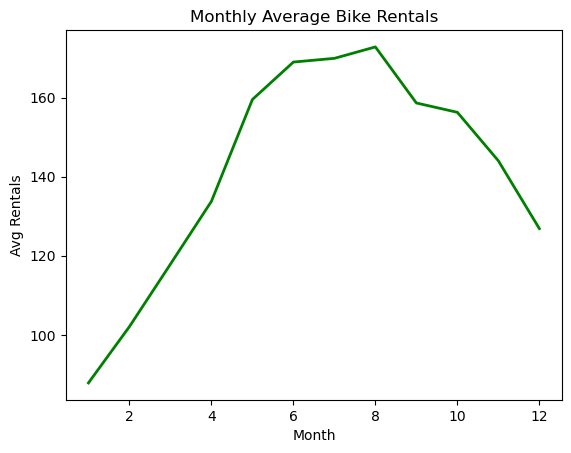

In [151]:
# Line Plot – Monthly Seasonality
monthly_cnt = df_make.groupby(df['dteday'].dt.month)['cnt'].mean()

sns.lineplot(
    x=monthly_cnt.index,
    y=monthly_cnt.values,
    color='green',
    markersize=18,
    markerfacecolor='black',
    linewidth=2
)

plt.title("Monthly Average Bike Rentals")
plt.xlabel("Month")
plt.ylabel("Avg Rentals")
plt.show()

##### The line plot shows the average number of bike rentals for each month.
##### Bike rentals are lowest at the beginning of the year (January–February).
##### They increase steadily from March and reach the highest level around June to September.
##### After October, bike rentals start decreasing toward the end of the year.
##### This pattern shows that bike rentals are high during warm months and low during cold months, indicating a clear seasonal effect.

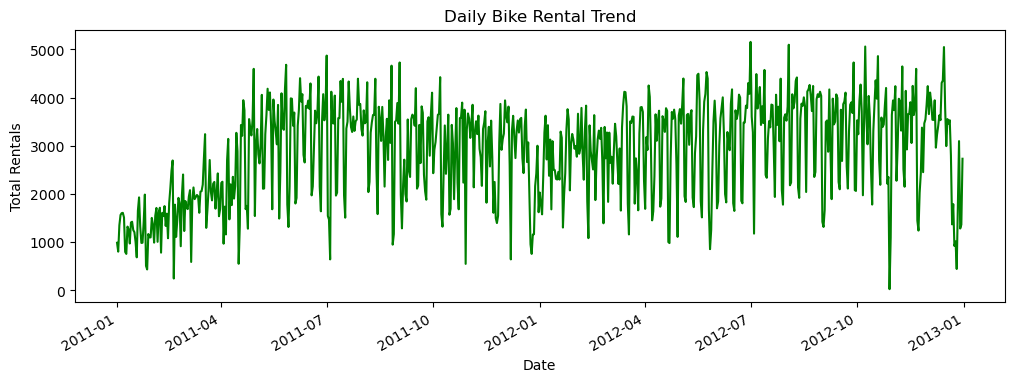

In [152]:
# Time Series Trend

daily_rentals = df_make.groupby('dteday')['cnt'].sum()

plt.figure(figsize=(12,4))
daily_rentals.plot(color='green')
plt.title("Daily Bike Rental Trend")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()

#####  The line plot shows how daily bike rentals change over time.
##### Overall, there is an upward trend, which means bike rentals increase as time passes.
##### Bike rentals are lower at the beginning, then gradually increase during warmer months, and decrease during colder periods.
##### The repeated ups and downs show a seasonal pattern, where rentals go up in certain months and down in others.
##### This indicates that time and season strongly affect bike rental demand.

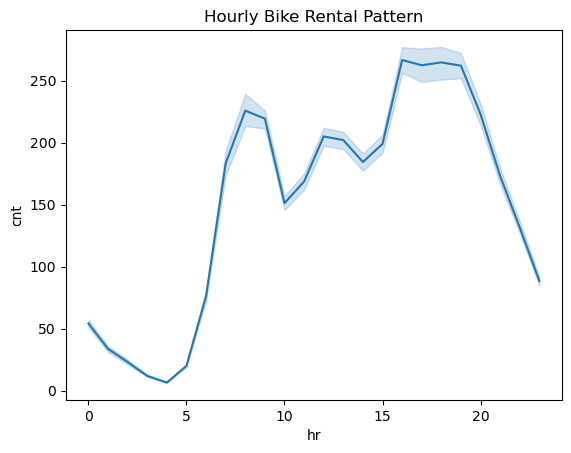

In [153]:
#Line Plot Hourly Usage Pattern
sns.lineplot(x='hr', y='cnt', data=df_make)
plt.title("Hourly Bike Rental Pattern")
plt.show()

##### The line plot shows how bike rentals change throughout the day.
##### Bike rentals are very low during late night and early morning hours.
##### There is a first peak in the morning (around 8–9 AM), which indicates people using bikes for office or college travel.
##### Rentals decrease slightly during the afternoon and then reach the highest peak in the evening (around 5–7 PM).
##### After evening hours, bike rentals gradually decrease.
##### This shows that bike rentals follow a daily commuting pattern.

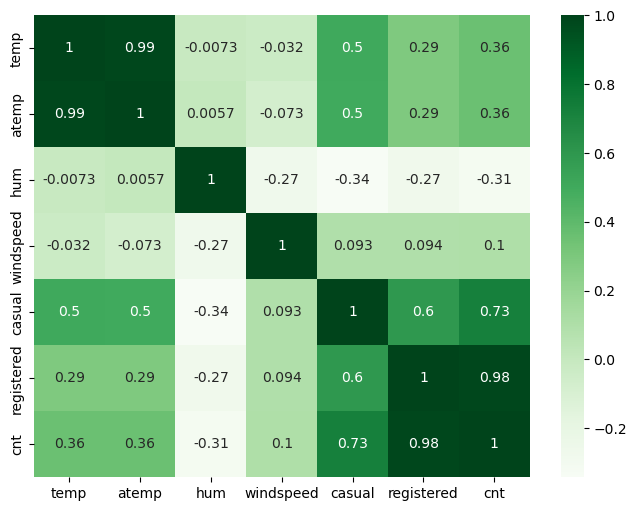

In [154]:
num_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']

plt.figure(figsize=(8,6))
cor = df_make[num_cols].corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

### The correlation heatmap shows how different features are related to bike rentals (cnt).
1) Temperature (temp) and feeling temperature (atemp) have a moderate positive relationship with total rentals, which means rentals increase when the weather is warm.
2) Humidity (hum) has a negative relationship with bike rentals, so higher humidity leads to fewer rentals.
3) Windspeed has very little effect on bike rentals.
4) Registered users have a very strong positive correlation with total rentals, meaning most bike rentals come from registered users.
5) Casual users also show a positive relationship, but less than registered users.
6) temp and atemp are highly correlated with each other, which means they carry similar information.
7) Overall, registered users and temperature are the most important factors affecting bike rentals.

In [155]:
df_make.drop(['casual', 'registered'], axis=1, inplace=True)

In [156]:
df_make['day']=df_make['dteday'].dt.day
df_make['month']=df_make['dteday'].dt.month
df_make['year']=df_make['dteday'].dt.year

In [157]:
df_make.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,month,year
0,1,2011-01-01,springer,2011.0,1.0,0,No,6,No work,Clear,0.24,0.2879,0.81,0.0,16,1,1,2011
1,2,2011-01-01,springer,2011.0,1.0,1,No,6,No work,Clear,0.22,0.2727,0.80,0.0,40,1,1,2011
2,3,2011-01-01,springer,2011.0,1.0,2,No,6,No work,Clear,0.22,0.2727,0.63,0.0,32,1,1,2011
3,4,2011-01-01,springer,2011.0,1.0,3,No,6,No work,Clear,0.24,0.2879,0.75,0.0,13,1,1,2011
4,5,2011-01-01,springer,2011.0,1.0,4,No,6,No work,Clear,0.24,0.2879,0.75,0.0,1,1,1,2011


In [158]:
df_make.drop(columns=['dteday','instant','yr','mnth'],inplace=True)

In [159]:
df_make.isnull().sum()

season        0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
month         0
year          0
dtype: int64

In [160]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.feature_selection import f_regression

In [161]:
target=df_make[['cnt']]
feature=df_make.drop(columns=['cnt'])

In [162]:
catg_col=[ i for i in feature.columns if feature[i].dtype=='O']
numm_col=[ i for i in feature.columns if feature[i].dtype!='O']


In [163]:
df1=feature[catg_col]
df2=feature[numm_col]
df1

,season,holiday,workingday,weathersit
0,springer,No,No work,Clear
1,springer,No,No work,Clear
2,springer,No,No work,Clear
3,springer,No,No work,Clear
4,springer,No,No work,Clear
...,...,...,...,...
17374,springer,No,Working Day,Mist
17375,springer,No,Working Day,Mist
17376,springer,No,Working Day,Clear
17377,springer,No,Working Day,Clear


In [164]:
df1.workingday.unique()

array(['No work', 'Working Day'], dtype=object)

In [165]:
##cat_cols = ['holiday', 'workingday']
##df1 = pd.get_dummies(df1, columns=cat_cols, drop_first=True,dtype='int')


In [166]:
df1['holiday'] = df1['holiday'].map({'No': 0, 'Yes': 1})

In [167]:
df1['workingday'] = df1['workingday'].map({'No work': 0, 'Working Day': 1})

In [168]:
#Encoding
season_map = {
    'springer': 1,
    'summer': 2,
    'fall': 3,
    'winter': 4
}
df1['season'] = df1['season'].map(season_map)


In [169]:
df1.season.unique()

array([1, 3, 2, 4])

In [170]:
df1.weathersit.unique()

array(['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], dtype=object)

In [171]:
df1= pd.get_dummies(df1,columns=['weathersit'],drop_first=False,dtype='int')


In [172]:
df1.season.value_counts()

season
1    3910
4    3710
3    3680
2    3634
Name: count, dtype: int64

In [173]:
# Ord_E=OrdinalEncoder()
# df1[['weathersit']]=(Ord_E.fit_transform(df1[['weathersit']]))
# df1

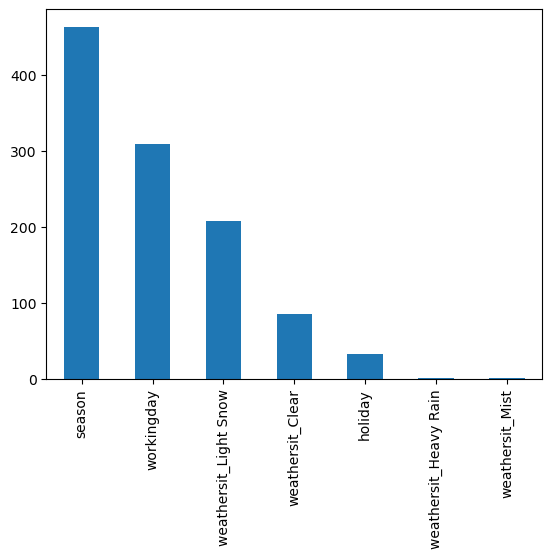

In [174]:
f_reg=f_regression(df1,target)
pd.Series(f_reg[0],index=df1.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

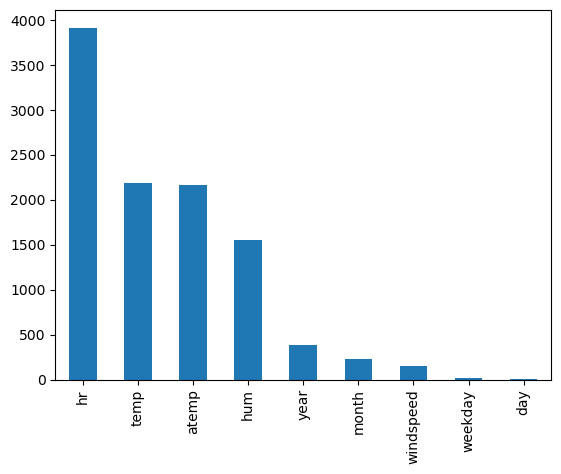

In [175]:
f_regg=f_regression(df2,target)
pd.Series(f_regg[0],index=df2.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [176]:
New_feature=pd.concat([df1,df2],axis=1)
New_feature.tail()

,season,holiday,workingday,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist,hr,weekday,temp,atemp,hum,windspeed,day,month,year
17374,1,0,1,0,0,0,1,19,1,0.26,0.2576,0.60,0.1642,31,12,2012
17375,1,0,1,0,0,0,1,20,1,0.26,0.2576,0.60,0.1642,31,12,2012
17376,1,0,1,1,0,0,0,21,1,0.50,0.2576,0.60,0.1642,31,12,2012
17377,1,0,1,1,0,0,0,22,1,0.26,0.2727,0.56,0.1343,31,12,2012
17378,1,0,1,1,0,0,0,23,1,0.26,0.2727,0.65,0.1343,31,12,2012


In [177]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
New_feature[['temp','atemp','hum','windspeed']]=sc.fit_transform(New_feature[['temp','atemp','hum','windspeed']])

In [178]:
New_feature

,season,holiday,workingday,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist,hr,weekday,temp,atemp,hum,windspeed,day,month,year
0,1,0,0,1,0,0,0,0,6,-1.256364,-1.013006,0.870758,-1.606139,1,1,2011
1,1,0,0,1,0,0,0,1,6,-1.361457,-1.102268,0.817628,-1.606139,1,1,2011
2,1,0,0,1,0,0,0,2,6,-1.361457,-1.102268,-0.085583,-1.606139,1,1,2011
3,1,0,0,1,0,0,0,3,6,-1.256364,-1.013006,0.551978,-1.606139,1,1,2011
4,1,0,0,1,0,0,0,4,6,-1.256364,-1.013006,0.551978,-1.606139,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0,0,0,1,19,1,-1.151270,-1.190942,-0.244973,-0.141683,31,12,2012
17375,1,0,1,0,0,0,1,20,1,-1.151270,-1.190942,-0.244973,-0.141683,31,12,2012
17376,1,0,1,1,0,0,0,21,1,0.109851,-1.190942,-0.244973,-0.141683,31,12,2012
17377,1,0,1,1,0,0,0,22,1,-1.151270,-1.102268,-0.457494,-0.408353,31,12,2012


In [179]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [180]:
x_train,x_test,y_train,y_test=train_test_split(New_feature,target,test_size=0.2,random_state=42)

In [181]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11947, 16)
(2987, 16)
(11947, 1)
(2987, 1)


**DecisionTreeRegressor**

In [182]:
d_tree=DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=12)
d_tree.fit(x_train,y_train)
y_prd= d_tree.predict(x_test)
r2_score(y_test,y_prd)

0.8760110792686393

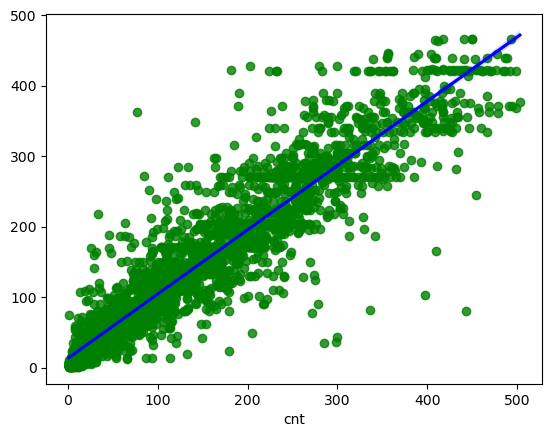

In [183]:
sns.regplot(x=y_test,y=y_prd,scatter_kws={'color':'green'},line_kws={'color':'blue'})
plt.show()

In [ ]:
parameter={'splitter':['best','random'],'max_depth': range(1,15)}
gride=GridSearchCV(d_tree,parameter)
gride.fit(x_train,y_train)
gride.best_params_

{'max_depth': 12, 'splitter': 'best'}

**RandomForestRegressor**

In [184]:
Random_f = RandomForestRegressor( n_estimators=500,max_depth=None,max_features='log2')
Random_f.fit(x_train,y_train)
y_prd1= Random_f.predict(x_test)
r2_score(y_test,y_prd1)

0.8753692705022171

In [ ]:
param_grid = {
    'n_estimators': [100, 200,500],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}
gride=GridSearchCV(Random_f, param_grid, cv=5)
gride.fit(x_train, y_train)
gride.best_params_



{'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}


**GradientBoostingRegressor**



In [185]:
GBR=GradientBoostingRegressor(n_estimators=200,learning_rate=0.5)
GBR.fit(x_train,y_train)
y_prd2= GBR.predict(x_test)
r2_score(y_test,y_prd2)

0.9164000458546079

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}
gride=GridSearchCV(GBR, param_grid, cv=5)
gride.fit(x_train, y_train)
gride.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

**XGBRegressor**

In [186]:
!pip install xgboost
from  xgboost import XGBRegressor



In [187]:
xbg=XGBRegressor(n_estimators=500,learning_rate=0.1,max_depth=5,sub_sample=0.8,random_state=42)
xbg.fit(x_train,y_train)
y_pred=xbg.predict(x_test)
r2_score(y_test,y_pred)

0.9395948648452759

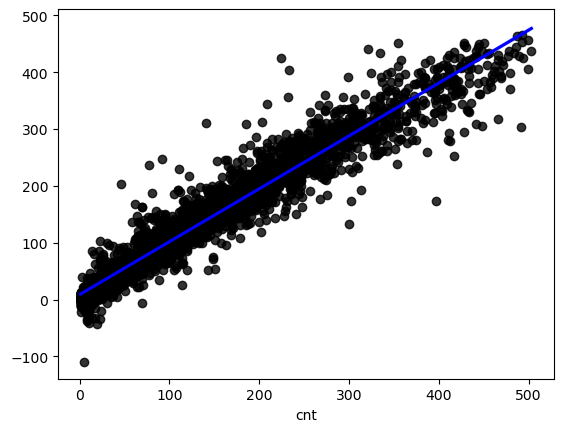

In [188]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'black'},line_kws={'color':'blue'})
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}
gride=GridSearchCV(xbg, param_grid, cv=5)
gride.fit(x_train, y_train)
gride.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

In [205]:
!pip install lightgbm
from lightgbm import LGBMRegressor


In [208]:
lgbm=LGBMRegressor(n_estimators=500,learning_rate=0.5,max_depth=5,reg_alpha=0,reg_lambda=5, random_state=42)
lgbm.fit(x_train,y_train)
y_predl=lgbm.predict(x_test)
r2_score(y_test,y_predl)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 11947, number of used features: 15
[LightGBM] [Info] Start training from score 140.837198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0.9363037961041871

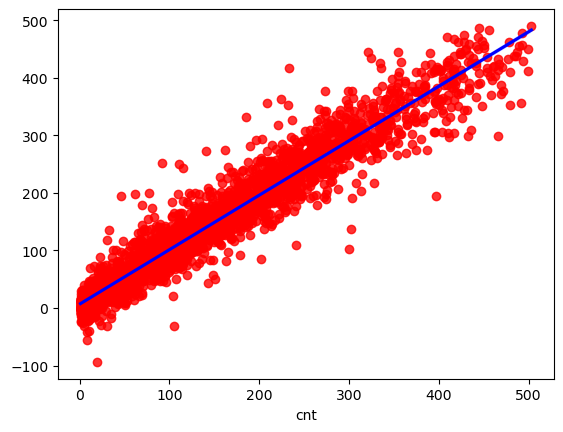

In [191]:
sns.regplot(x=y_test,y=y_predl,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200,500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'reg_alpha': [0, 5, 10],
    'reg_lambda': [0, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}
gride=GridSearchCV(lgbm, param_grid, cv=5)
gride.fit(x_train, y_train)
gride.best_params_

In [ ]:
models = {
    "DTR":DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=11),
    "RandomForest": RandomForestRegressor(n_estimators=200,random_state=42,max_depth=20,max_features='sqrt'),
    "GBR":GradientBoostingRegressor(n_estimators=200,learning_rate=0.5,),
    "XGBoost":XGBRegressor(n_estimators=200,learning_rate=0.1,max_depth=5,sub_sample=0.8,random_state=42),
    "LightGBM":LGBMRegressor(n_estimators=500,learning_rate=0.1,max_depth=5,reg_alpha=0,reg_lambda=5,random_state=42),
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results.append({
        "Model": name,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "Adj_r2":1-(((1-r2_score(y_test, y_pred))*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1))
    })

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 11947, number of used features: 15
[LightGBM] [Info] Start training from score 140.837198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

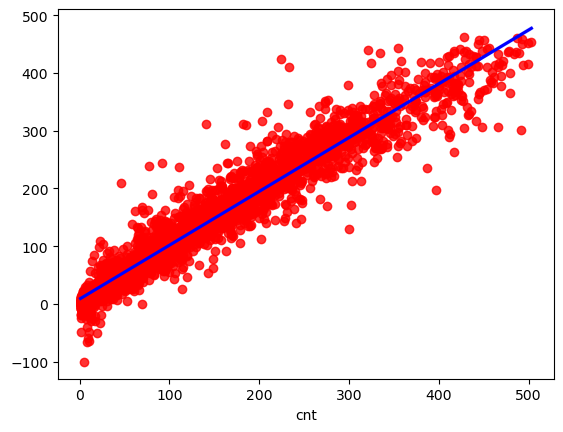

In [210]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.show()

In [211]:
file='Lgbmodel.pkl'

In [212]:
import pickle
pickle.dump(lgbm,open(file,'wb'))